In [80]:
import csv
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [81]:
## reading data saved in .csv file
t_vec,ir_vec,red_vec = [],[],[]
with open('oximeterData.csv',newline='') as csvfile:
    csvreader = csv.reader(csvfile,delimiter=',')
    for row in csvreader:
        t_vec.append(float(row[0]))
        ir_vec.append(float(row[1]))
        red_vec.append(float(row[2]))
t_vec=[val/1000 for val in t_vec]

In [86]:
s1 = 500 # change this for different range of data
s2 = len(t_vec) # change this for ending range of data
t_vec = np.array(t_vec[s1:s2])
ir_vec = ir_vec[s1:s2]
red_vec = red_vec[s1:s2]


In [87]:
# sample rate and heart rate ranges
samp_rate = 1/np.mean(np.diff(t_vec)) # average sample rate for determining peaks
print(samp_rate)
heart_rate_range = [0,250] # BPM
heart_rate_range_hz = np.divide(heart_rate_range,60.0)

24.512559219218783


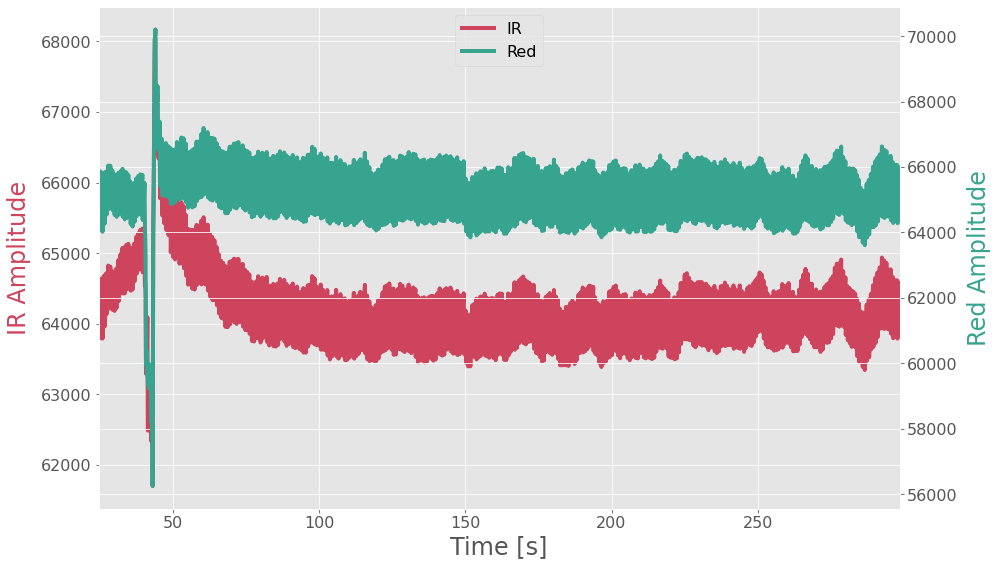

In [88]:
## plotting time series data
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time [s]',fontsize=24)
ax1.set_ylabel('IR Amplitude',fontsize=24,color='#CE445D',labelpad=10)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt1 = ax1.plot(t_vec,ir_vec,label='IR',color='#CE445D',linewidth=4)
ax1_2 = plt.twinx()
ax1_2.grid('off')
ax1_2.set_ylabel('Red Amplitude',fontsize=24,color='#37A490',labelpad=10)
ax1_2.tick_params(axis='y',which='major',labelsize=16)
plt2 = ax1_2.plot(t_vec,red_vec,label='Red',color='#37A490',linewidth=4)
lns = plt1+plt2
labels = [l.get_label() for l in lns]
ax1_2.legend(lns,labels,fontsize=16,loc='upper center')
plt.xlim([t_vec[0],t_vec[-1]])
plt.tight_layout(pad=1.2)

BPM: 79.3


<ipython-input-89-bd1d8de5e3f4>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim([0,f_vec[-1]])
<ipython-input-89-bd1d8de5e3f4>:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim([np.min(fft_var)-np.std(fft_var),np.max(fft_var)])


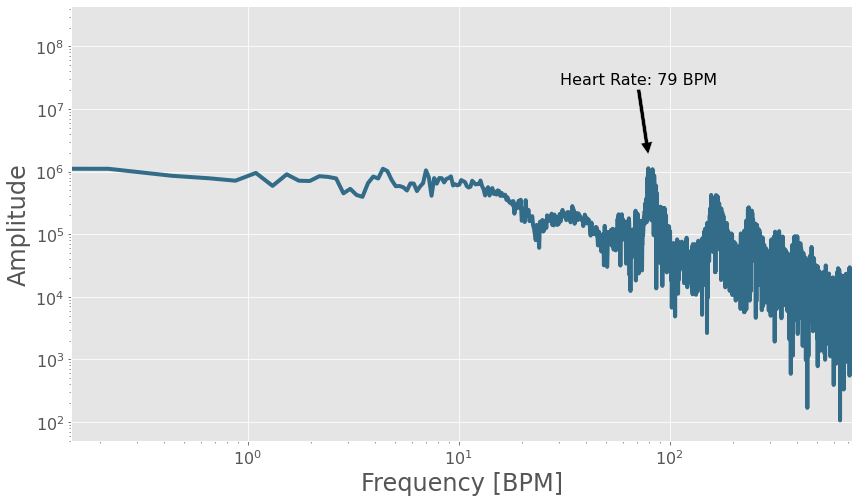

In [89]:
## FFT and plotting frequency spectrum of data
f_vec = np.arange(0,int(len(t_vec)/2))*(samp_rate/(len(t_vec)))
f_vec = f_vec*60


fft_var = np.fft.fft(red_vec)
fft_var = np.append(np.abs(fft_var[0]).astype(int),2.0*np.abs(fft_var[1:int(len(fft_var)/2)]).astype(int),
                    np.abs(fft_var[int(len(fft_var)/2)]).astype(int))

bpm_max_loc = np.argmin(np.abs(f_vec-heart_rate_range[1]))
f_step = 1
f_max_loc = np.argmax(fft_var[f_step:bpm_max_loc])+f_step
print('BPM: {0:2.1f}'.format(f_vec[f_max_loc]))
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.loglog(f_vec,fft_var,color=[50/255,108/255,136/255],linewidth=4)
ax2.set_xlim([0,f_vec[-1]])
ax2.set_ylim([np.min(fft_var)-np.std(fft_var),np.max(fft_var)])
ax2.tick_params(axis='both',which='major',labelsize=16)
ax2.set_xlabel('Frequency [BPM]',fontsize=24)
ax2.set_ylabel('Amplitude',fontsize=24)
ax2.annotate('Heart Rate: {0:2.0f} BPM'.format(f_vec[f_max_loc]),
             xy = (f_vec[f_max_loc],fft_var[f_max_loc]+(np.std(fft_var)/10)),xytext=(-10,70),
             textcoords='offset points',arrowprops=dict(facecolor='k'),
             fontsize=16,horizontalalignment='center')
fig2.savefig('max30102_fft_heart_rate.png',dpi=300,facecolor=[252/255,252/255,252/255])
plt.show()